### Data Driven Vs Model-Driven methods 

Suppose you want to measure the electricity demand of a city in the future. 
<h4> Model-Driven Methods</h4>
- Predictor variables can also be used in time series forecasting. For example, suppose we wish to forecast the hourly electricity demand (ED) of a hot region during the summer period. A model with predictor variables might be of the form. 
- We call this an “explanatory model” because it helps explain what causes the variation in electricity demand.
<p style="text-align: center;"><b>$ED = f(current temperature, strength of economy, population, time of day, day of week, error)$ </b></p>

<h4> Data-Driven methods </h4>
- prediction of the future is based on past values of a variable, but not on external variables which may affect the system. 
<p style="text-align: center;"><b>$ED_{t+1}=f(Y_{t},Y_{t−1},Y_{t−2},Y_{t−3},…,error)$</b></p>

<h4> Mixed Methods </h4>
- mixed models have been given various names in different disciplines. They are known as dynamic regression models, panel data models, longitudinal models, transfer function models, and linear system models (assuming that f is linear). The take the following form,
<p style="text-align: center;"><b>$ED_{t+1}=f(Y_{t}, current, temperature, strength of economy, population, time of day, day of week, error)$</b></p>

In [1]:
## Load the data
import pandas as pd
import numpy as np
import datetime
import math
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
%matplotlib inline 

tss = pd.read_csv("data/AusAntidiabeticDrug.csv")
tss["ds"] = pd.to_datetime(tss["ds"])
tss.index = tss["ds"]
tss = tss[["y"]]
print(tss.shape)
tss.head()

(204, 1)


,y
ds,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


## Split the data into train and test
- We will use simple train and test split here to make the process simple. In reality, it is better to perform Cross-Validation if you have enough compute power

In [2]:
x_train = tss[tss.index <datetime.datetime(2005, 1, 1, 0, 0, 0)]
x_test = tss[tss.index >=datetime.datetime(2005, 1, 1, 0, 0, 0)]
print(x_train.shape, x_test.shape)

(162, 1) (42, 1)


## White Noise
- A time series is white noise if the variables are independent and identically distributed with a mean of zero. 
- All variables have same variance and each value has a zero correlation with all other values in the series.
- If the variables in the series are drawn from a Gaussian distribution, the series is called Gaussian white noise.

### Is your Time Series White noise?
Your time series is not white noise if any of the following conditions are true:
- Does your series have a zero mean?
- Does the variance change over time?
- Do values correlate with lag values?

### What to do?
- Check the mean and variance over a period of time by taking different intervals
- create a correlogram and check for any autocorrelation with lag variables

## Random Walk
How do you know your time series problem is predictable?

Is your time series a random walk?
- The time series shows a strong temporal dependence that decays linearly or in a similar pattern.
- The time series is non-stationary and making it stationary shows no obviously learnable structure in the data.
    - Draw a correllogram of Auto-correlations. check if there is any correlation with the lag variable
    - Make the data stationary(Discussed later) and check if there is any correlation with the lag variable. if the point one has and the point two doesn't them your data is random walk

- The persistence model provides the best source of reliable predictions. (if your baseline models (Naive forecast) are performing well compared to all the models u build, you are dealing with random walk


## Algorithms:

We will look into the following Algorithms 
- Simple Moving Averages
- Simple Exponential Smoothing
- Holts Method (Trend)
- Holts-Winter Method (Trend and Seasonality)
- ARIMA Models

## Simple Moving Averages 
- Basically used to smooth the curve and remove random-fluctuations
- Good for forecasting when there is no clear trend and seasonality in the data 
- Choose n by checking for auto-correlation in the series. 
- often mostly used to smooth the time-series and is very less used in forecasting.
\begin{equation*}
T_{t+1} = (1/m)(\sum_{k=1}^m\  T_{t-k})
\end{equation*}

In [3]:
import ts
pred = ts.simple_mv(x_train.values, x_test.values, n=12)
pred = pd.DataFrame(pred)
pred.columns = ["yhat"]
pred.index = tss.index
pred.head()
measure = math.pow(mean_squared_error(x_test.values, pred[pred.index >=datetime.datetime(2005, 1, 1, 0, 0, 0)].values), 0.5)
print("RMSE: ",measure)

RMSE:  6.460844497482257


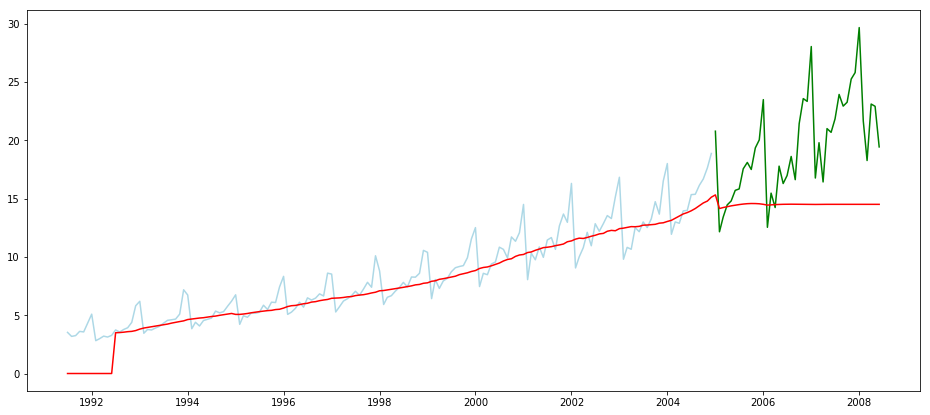

In [4]:
## Lets plot and see how the model worked on test data
plt.figure(figsize=(16, 7))
plt.plot(x_train.index, x_train.values, color="lightblue")
plt.plot(x_test.index, x_test.values, color="green")
plt.plot(pred.index, pred.fillna(0).values, color="red")
plt.show()

## Simple Exponential Smoothing 

- The simplest of the exponentially smoothing methods is naturally called “simple exponential smoothing”.
- This method is suitable for forecasting data with no clear trend or seasonal pattern but can fit into some kind of non-linear function.
- often works better than simple moving averages.
- Can be used for stock predictions 

\begin{equation*}
F_{t+1} = \alpha * F_{t}  + \alpha * (1 - \alpha) * F_{t-1} + \alpha * (1 - \alpha)^2 * F_{t-2} + .....N
\end{equation*}

Here $\alpha$ and n are two hyper-parameter which needs to be tuned using the validation set 

In [5]:
## Apply a Grid search to find the best model,
import ts
for i in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    pred = ts.ses(x_train.values, x_test.values, alpha=i, n=12)
    pred = pd.DataFrame(pred)
    pred.columns = ["yhat"]
    pred.index = tss.index
    measure = math.pow(mean_squared_error(x_test.values, pred[pred.index >=datetime.datetime(2005, 1, 1, 0, 0, 0)].values), 0.5)
    print("alpha: {} RMSE:{}".format(i,measure))

alpha: 0.1 RMSE:16.902737191795765
alpha: 0.2 RMSE:10.506228033620037
alpha: 0.3 RMSE:7.13184832363266
alpha: 0.4 RMSE:6.401425561453352
alpha: 0.5 RMSE:6.413902122085201
alpha: 0.6 RMSE:6.5312701370431565
alpha: 0.7 RMSE:6.660698278269404
alpha: 0.8 RMSE:6.816660260629047
alpha: 0.9 RMSE:6.993417647272655


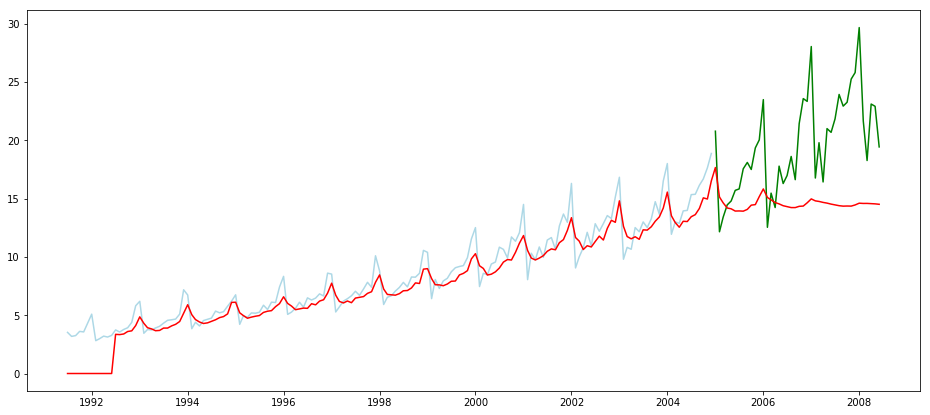

In [6]:
plt.figure(figsize=(16, 7))
plt.plot(x_train.index, x_train.values, color="lightblue")
plt.plot(x_test.index, x_test.values, color="green")
pred = pd.DataFrame(ts.ses(x_train.values, x_test.values, alpha=0.4, n=12))
pred.columns = ["yhat"]
pred.index = tss.index
plt.plot(pred.index, pred.fillna(0).values, color="red")
plt.show()

## Holts - Linear Model (Trend)
**Holt (1957)** extended simple exponential smoothing to allow the forecasting of data with a trend. This method involves a forecast equation and two smoothing equations (one for the level and one for the trend):

\begin{equation*}
ForecastEquation: \ yhat_{t+h/t} = l_{t}+h * b_{t} 
\end{equation*}
\begin{equation*}
Level Equation: \  l_{t} = \alpha * y_{t} +(1-\alpha)*(y_{t-1}+b_{t-1})
\end{equation*}
\begin{equation*}
Trend Equation: \  b_{t} = \beta ∗ (l_{t}−l_{t−1}) + (1−\beta)∗b_{t−1}
\end{equation*}


- The forecast function is no longer flat but trending. 
- The $h$-step-ahead forecast is equal to the last estimated level plus $h$-times the last estimated trend value. Hence the forecasts are a linear function of $h$.

In [7]:
import holtswinter
pred , alpha, beta, rmse =holtswinter.linear(list(x_train.values), len(x_test.values))
print(len(pred), alpha, beta, rmse)

42 0.432615819808 0.0401462774444 1.4744216577126246


4.034449767941766


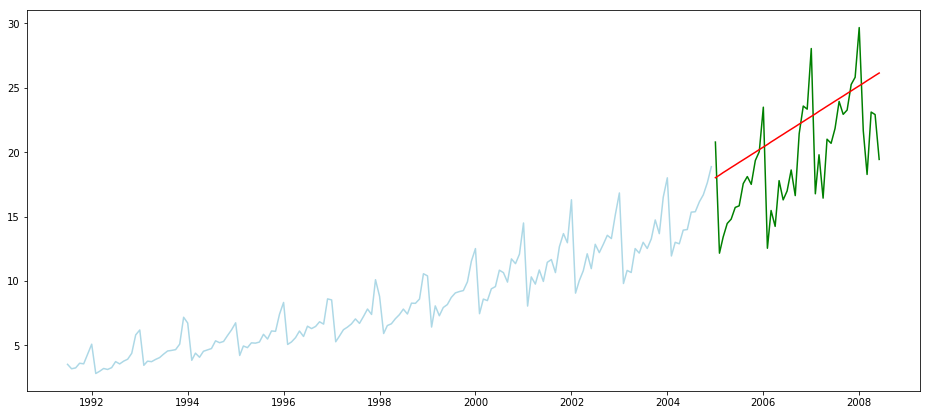

In [8]:
plt.figure(figsize=(16, 7))
plt.plot(x_train.index, x_train.values, color="lightblue")
plt.plot(x_test.index, x_test.values, color="green")
pred = pd.DataFrame(pred)
pred.columns = ["yhat"]
pred.index = x_test.index
measure = math.pow(mean_squared_error(x_test.values, pred.values), 0.5)
print(measure)
plt.plot(pred.index, pred.fillna(0).values, color="red")
plt.show()

## Holts Winter Method
- Holt (1957) and Winters (1960) extended Holt’s method to capture seasonality. 
- The Holt-Winters seasonal method comprises the forecast equation and three smoothing equations — 
    - one for the **level** $l_{t}$ 
    - one for the **trend** $b_{t}$, and
    - one for the **seasonal** component $s_{t}$, 
 
with corresponding smoothing parameters $\alpha$, $\beta$  and $\gamma$. We use  $m$ to denote the frequency of the seasonality, i.e., the number of seasons in a year.  

For example, for quarterly data  $m$=4, and for monthly data $m$=12


## The Additive Method
- The additive method is preferred when the seasonal variations are roughly constant through the series.
- the seasonal component is expressed in absolute terms in the scale of the observed series, 
- In the level equation the series is seasonally adjusted by subtracting the seasonal component.
\begin{align*}
  \hat{y}_{t+h|t} = \ell_{t} + hb_{t} + s_{t-m+h_{m}^{+}} \\
  \ell_{t} = \alpha(y_{t} - s_{t-m}) + (1 - \alpha)(\ell_{t-1} + b_{t-1})\\
  b_{t} = \beta^*(\ell_{t} - \ell_{t-1}) + (1 - \beta^*)b_{t-1}\\
  s_{t} = \gamma (y_{t}-\ell_{t-1}-b_{t-1}) + (1-\gamma)s_{t-m},
\end{align*}\

## The Multiplicative Method
- The multiplicative method is preferred when the seasonal variations are changing proportional to the level of the series.
- The seasonal component is expressed in relative terms (percentages), and the series is seasonally adjusted by dividing through by the seasonal component. 
\begin{align*}
  \hat{y}_{t+h|t} = (\ell_{t} + hb_{t})s_{t-m+h_{m}^{+}}. \\
  \ell_{t} = \alpha \frac{y_{t}}{s_{t-m}} + (1 - \alpha)(\ell_{t-1} + b_{t-1})\\
  b_{t} = \beta^*(\ell_{t}-\ell_{t-1}) + (1 - \beta^*)b_{t-1}                \\
  s_{t} = \gamma \frac{y_{t}}{(\ell_{t-1} + b_{t-1})} + (1 - \gamma)s_{t-m}
\end{align*}\

In [9]:
## Import functions 
import holtswinter
pred , alpha, beta, gamma, rmse =holtswinter.multiplicative(list(x_train.values), 12, len(x_test.values))
print(len(pred), alpha, beta, rmse)

42 0.188258842638 0.0529014597158 0.5004130530199231


1.7868621621198282


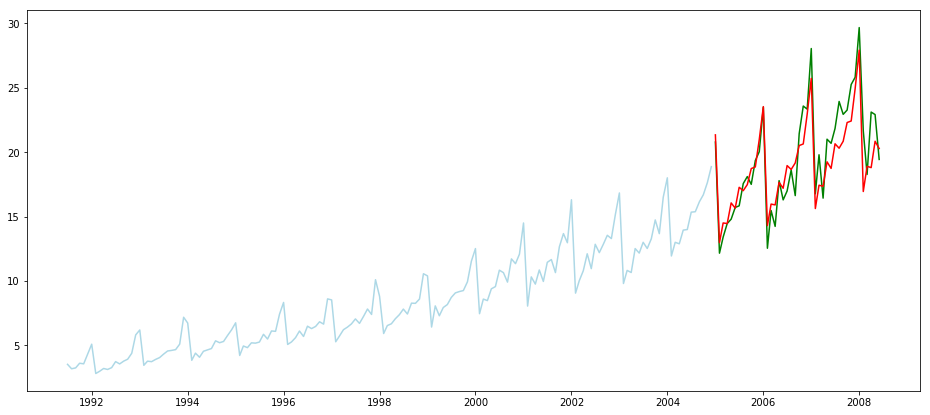

In [10]:
plt.figure(figsize=(16, 7))
plt.plot(x_train.index, x_train.values, color="lightblue")
plt.plot(x_test.index, x_test.values, color="green")
pred = pd.DataFrame(pred)
pred.columns = ["yhat"]
pred.index = x_test.index
measure = math.pow(mean_squared_error(x_test.values, pred.values), 0.5)
print(measure)
plt.plot(pred.index, pred.fillna(0).values, color="red")
plt.show()

### Insights:
- The model perfectly fits both seasonality and trend and the error dropped to 1.78, which is better than any model we have observed till now. 

## A taxmony of Exponential Smoothing methods
- By considering variations in the combinations of the trend and seasonal components, nine exponential smoothing methods are possible
- Damped trend is nothing but exponential growth or decline
- In addition too these main-stream 9 equations there might be some time-series trend taking some higher-order polynomial functions.

### 9 Exponential smoothing methods
![9 exponential models](Images/9_exp.png)

### Equations 
![9 exponential models](Images/9_exp_equations.png)

### Graphs
![9 exponential models Graphs](Images/9_exp_graph.png)


## ARIMA Models (Auto-Regressive Integrated moving averages)
- ARIMA models provide another approach to time series forecasting. 
- ARIMA models are built assuming data are stationary. (We will shortly look into what does stationarity of data means?)

In ARIMA class of models we have 
- AR - Auto Regressive models.
- MA - Moving Average models (This is not moving averages we discussed in the intial. They are smoothing functions not used for forecasting, but here Moving average models are used to forecast future values.)
- Non-Seasonal ARIMA models 
- Seasonal ARIMA models 

## Stationarity and Differencing 

### What is Stationarity ?
- A stationary time series is one whose properties do not depend on the time at which the series is observed. Thus, time series with trends, or with seasonality, are not stationary.
- a white noise series is stationary — it does not matter when you observe it, it should look much the same at any point in time.

Can you tell which of the following time series are strictly stationary ?
![Cross Validation](Images/stationarity.png)

b and g are stationary.

### Why to consider stationarity ?
ARIMA models assumes the data to be stationary. It will be clear soon when we model the data. Lets look at how to convert a non-stationary data to stationary data. 

### How do we convert a non-stationary data to stationary data ?

### What is differencing ?
- Computing the difference between consecutive numbers is called differencing.
- Transformations such as logarithms can help to stabilize the variance of a time series. Differencing can help stabilize the mean of a time series by removing changes in the level of a time series, and therefore eliminating (or reducing) trend and seasonality.

#### Second-order differencing
- Occasionally the differenced data will not appear to be stationary and it may be necessary to difference the data a second time to obtain a stationary series.

\begin{align*}
y'_{t}= y_{t} - y_{t-1} \\
y'_{t}= (y_{t} - y_{t-1}) - (y_{t-1}-y_{t-2}) \\
y'_{t}= y_{t} - 2*y_{t-1} +y_{t-2} \\
\end{align*}

Visualizing Stationarity is a mess. Can't we Quantify it ? Statisitcal tests Comes as saviours
- <b>Augmented Dickey-Fuller (ADF) test</b>:
    - Null Hypothesis: data are non-stationary
    - large p-values are indicative of non-stationarity, and small p-values suggest stationarity. Using the usual 5% threshold, differencing is required if the p-value is greater than 0.05.  
    
- <b>Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test</b>.
    - Null Hypothesis: data are stationary
    - Just reverse the above case for p-values 

Test Statistic                   2.228300
p-value                          0.998905
#Lags Used                      14.000000
Number of Observations Used    147.000000
Critical Value (1%)             -3.475637
Critical Value (5%)             -2.881410
Critical Value (10%)            -2.577365
dtype: float64


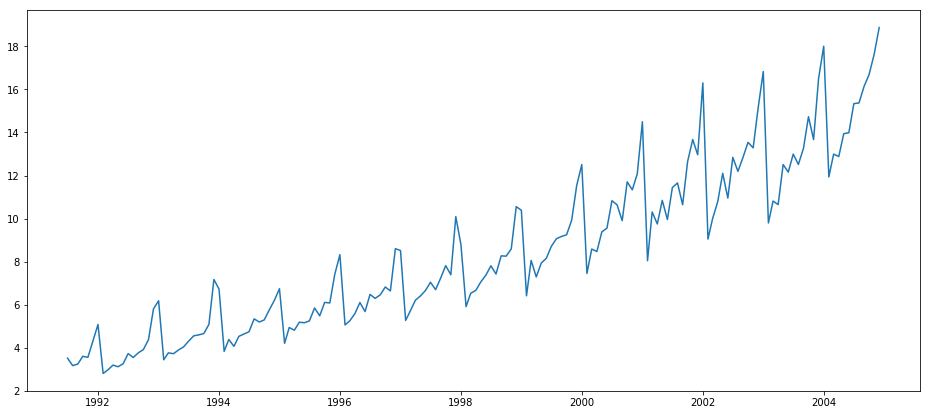

In [11]:
from statsmodels.tsa.stattools import adfuller

def stationarity_test(data):
    dftest = adfuller(data.y, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    plt.figure(figsize=(16, 7))
    plt.plot(data.index, data.y)
    plt.show()

stationarity_test(x_train)

- The data is highly non-stationary. 
- We need to apply log-transformations to make variance constant

Test Statistic                  -0.660497
p-value                          0.856718
#Lags Used                      14.000000
Number of Observations Used    147.000000
Critical Value (1%)             -3.475637
Critical Value (5%)             -2.881410
Critical Value (10%)            -2.577365
dtype: float64


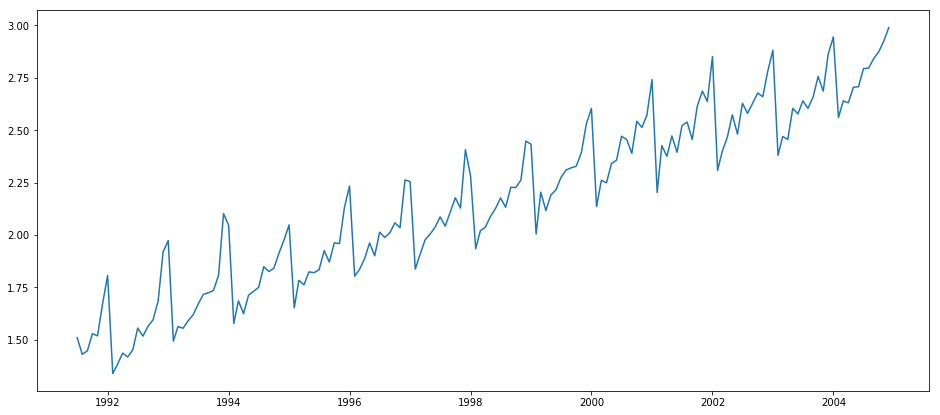

In [12]:
## Now take the log (To make variance constant) and check for stationary again 
log_train = x_train
log_train = log_train["y"].apply(lambda x: math.log(x+1))
log_train = pd.DataFrame(log_train)
stationarity_test(log_train)

- The data is still highly non-stationary. But the variance became constant.  
- Lets remove seasonality and check: subtracting every nth term with n-12th term will let us do this.

Test Statistic                  -4.034900
p-value                          0.001238
#Lags Used                      13.000000
Number of Observations Used    148.000000
Critical Value (1%)             -3.475325
Critical Value (5%)             -2.881275
Critical Value (10%)            -2.577293
dtype: float64


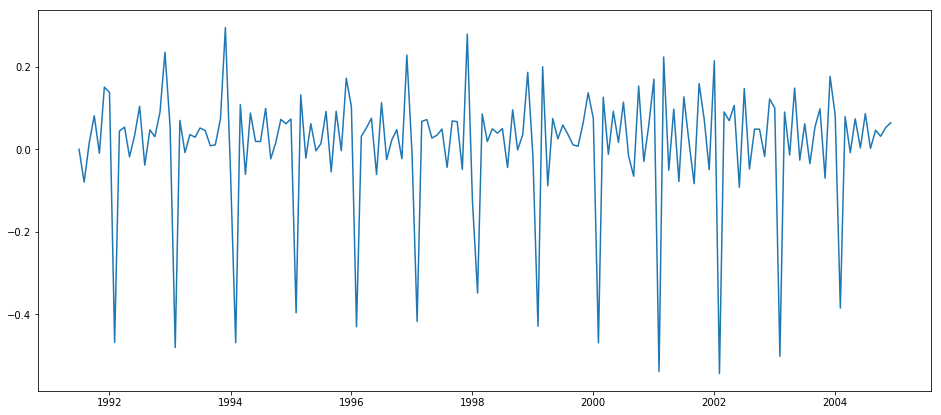

In [13]:
first_diff = log_train["y"] - log_train["y"].shift(1)
first_diff = first_diff.fillna(0)
first_diff = pd.DataFrame(first_diff)
stationarity_test(first_diff)

- Cool the P-value is less than 0.05 and we have achieved stationarity. 
- A time series with cyclic behaviour (but with no trend or seasonality) is stationary. This is because the cycles are not of a fixed length, so before we observe the series we cannot be sure where the peaks and troughs of the cycles will be.

Lets also look what happens if we use seasonal differencing. This might be useful when we model seasonal ARIMA models 

Test Statistic                  -5.079978
p-value                          0.000015
#Lags Used                      11.000000
Number of Observations Used    150.000000
Critical Value (1%)             -3.474715
Critical Value (5%)             -2.881009
Critical Value (10%)            -2.577151
dtype: float64


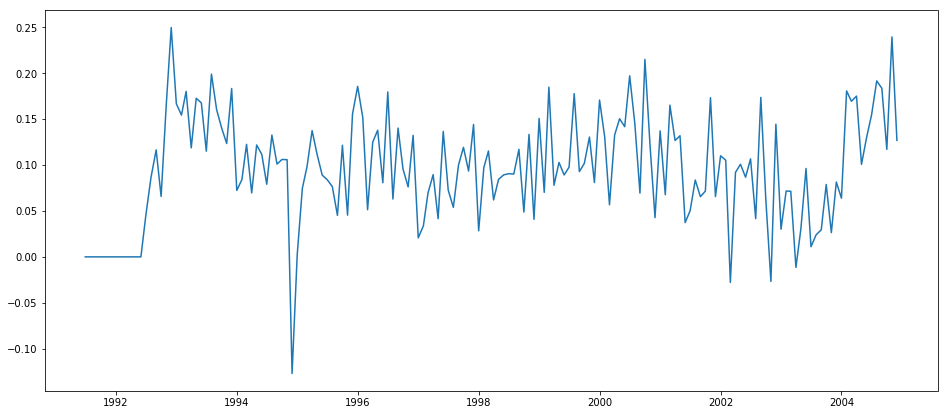

In [14]:
seasonal_data_differenced = log_train["y"] - log_train["y"].shift(12)
seasonal_data_differenced = seasonal_data_differenced.fillna(0)
seasonal_data_differenced = pd.DataFrame(seasonal_data_differenced)
stationarity_test(seasonal_data_differenced)

- Wow, the the p-value is less than 0.05 and we can clearly see that the differencing has led to stationarity of data.

Lets quickly jump on to ARIMA literature and modelling. 

## Auto-Regressive Models - AR(p)
- we forecast the variable of interest using a linear combination of predictors. 

An AR(p) model is denoted by

\begin{align*}
y_{t} = c+ \phi_{1} * y_{t-1} + \phi_{2} * y_{t-2} + .... + \phi_{p} * y_{t-p} + e_{p}
\end{align*}

where  $e_{t}$ is white noise.

#### Now understood why ARIMA assumes stationarity? 
- It because there is a problem of multi-collinearity if the data is non-stationary. 

<b>We will build AR models once the boring and useful theory is done.</b>

## Moving Average Models - MA(q)
- Rather than using past values of the forecast variable in a regression, a moving average model uses past forecast errors in a regression-like model.

An MA(q) model is denoted by, 

\begin{align*}
y_{t} = c+ \theta_{1} * e_{t-1} + \theta_{2} * e_{t-2} + .... + \theta_{p} * e_{t-q} 
\end{align*}

- Unlike AR here we don't do any Regression. We take the outputs of AR model, measure the errors and model these errors using the above function.

### Number of Differences (d): 
- These are the number of nonseasonal differences to be performed on the data for achieving stationarity

So Finally we model **ARIMA(p, q, d)** and finding out **p, q, d** values is the major task in building models using ARIMA class of models. 

Lets have a look at how this is achieved.

### Modelling Arima Models using Python
- Inorder to model we have to figure out what values does p q and d takes. From the stationarity test, we have already obsevred that d =1. 
- To find out the values of P & q we need to look at the ACF and PACF plots.

##### Autocorrelation Function (ACF):  (useful to estimate q)
- It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).

##### Partial Autocorrelation Function (PACF): (useful to estimate p)
- This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.

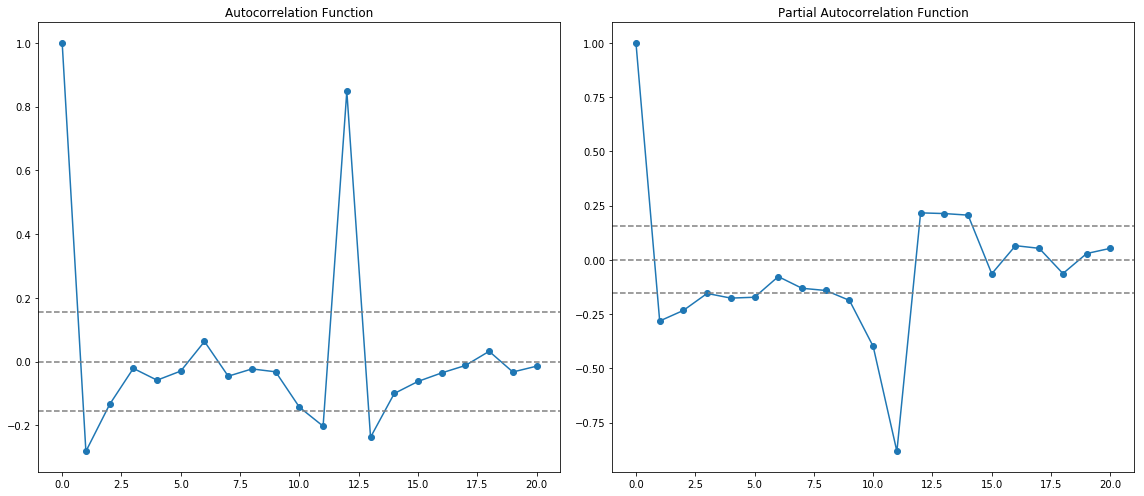

In [15]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(first_diff, nlags=20)
lag_pacf = pacf(first_diff, nlags=20, method='ols')

plt.figure(figsize=(16, 7))
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(first_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(first_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')


#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(first_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(first_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

1. **p** – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=1 has +ve correlation and p=12 has high negitive correlation.
2. **q** – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=1 and q=12 has very high positive correlation

In [16]:
## AR Model p=1, d=1, q=0 
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(log_train, order=(1, 1, 0))  
results_AR = model.fit(disp=-1)  

4.744465329690813


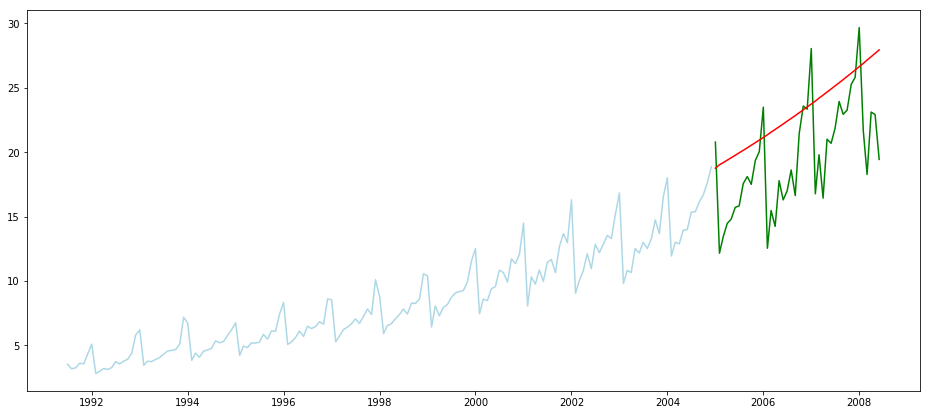

In [17]:
plt.figure(figsize=(16, 7))
plt.plot(x_train.index, x_train.values, color="lightblue")
plt.plot(x_test.index, x_test.values, color="green")

## Forecasting 
pred = pd.DataFrame(results_AR.forecast(len(x_test))[0])
pred.columns = ["yhat"]
pred.index = x_test.index

## Converting from log to normal value
pred["yhat"] = pred["yhat"].apply(lambda x: math.exp(x)-1)

## Measuring error. 
measure = math.pow(mean_squared_error(x_test.values, pred.values), 0.5)
print(measure)
plt.plot(pred.index, pred.fillna(0).values, color="red")
plt.show()

- RMSE: 4.74. We can do better than this. Lets check wat an MA model is giving

3.2033966512077447


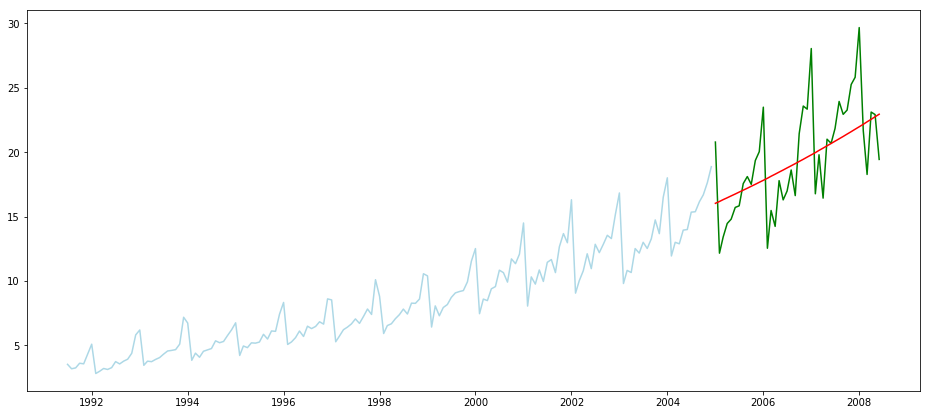

In [18]:
## MA Model p=0, d=1, q=1 
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(log_train, order=(0, 1, 1))  
results_MA = model.fit(disp=-1)  


plt.figure(figsize=(16, 7))
plt.plot(x_train.index, x_train.values, color="lightblue")
plt.plot(x_test.index, x_test.values, color="green")

## Forecasting 
pred = pd.DataFrame(results_MA.forecast(len(x_test))[0])
pred.columns = ["yhat"]
pred.index = x_test.index

## Converting from log to normal value
pred["yhat"] = pred["yhat"].apply(lambda x: math.exp(x)-1)

## Measuring error. 
measure = math.pow(mean_squared_error(x_test.values, pred.values), 0.5)
print(measure)
plt.plot(pred.index, pred.fillna(0).values, color="red")
plt.show()

- RMSE: 3.20. This is better than AR model. MA is better at smoothing the time-series graph and gives a linear trend while predicting.

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  161
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 103.570
Method:                       css-mle   S.D. of innovations              0.125
Date:                Sat, 25 Nov 2017   AIC                           -199.139
Time:                        21:40:01   BIC                           -186.814
Sample:                    08-01-1991   HQIC                          -194.135
                         - 12-01-2004                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0083      0.000     27.653      0.000       0.008       0.009
ar.L1.D.y      0.3060      0.076      4.040      0.000       0.158       0.454
ma.L1.D.y     -1.0000      0.016    -63.076      0.0

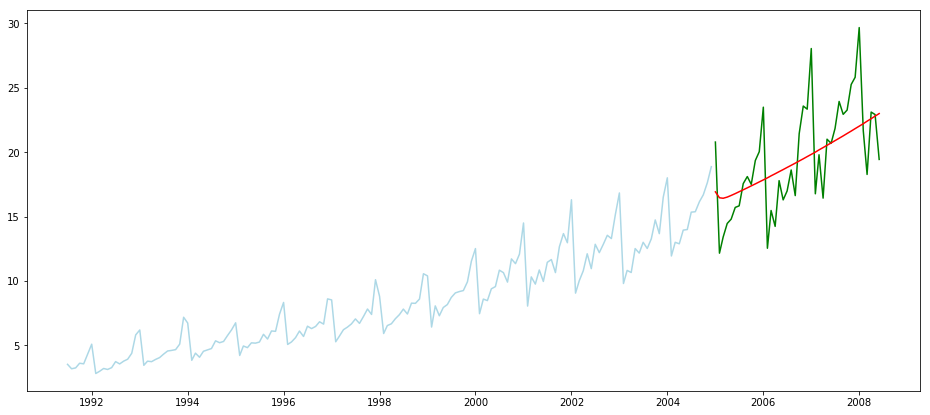

In [19]:
### Using both AR and MA with differencing 
## ARIMA Model p=1, d=1, q=1 
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(log_train, order=(1, 1, 1))  
results_ARIMA = model.fit(disp=-1)
print(results_ARIMA.summary())


plt.figure(figsize=(16, 7))
plt.plot(x_train.index, x_train.values, color="lightblue")
plt.plot(x_test.index, x_test.values, color="green")

## Forecasting 
pred = pd.DataFrame(results_ARIMA.forecast(len(x_test))[0])
pred.columns = ["yhat"]
pred.index = x_test.index

## Converting from log to normal value
pred["yhat"] = pred["yhat"].apply(lambda x: math.exp(x)-1)

## Measuring error. 
measure = math.pow(mean_squared_error(x_test.values, pred.values), 0.5)
print(measure)
plt.plot(pred.index, pred.fillna(0).values, color="red")
plt.show()

- RMSE: 3.18 is slightly better than the previous both MA model and much better than AR models.
- Akaike’s Information Criterion (AIC), which was useful in selecting predictors for regression, is also useful for determining the order of an ARIMA model. The less value, the better the model.

### Sesonal ARIMA models 
- We have restricted our attention to non-seasonal data and non-seasonal ARIMA models.
- However, ARIMA models are also capable of modelling a wide range of seasonal data.

Non Seasonal Part of the model:
\begin{align*}
(p, q, d)
\end{align*}

Seasonal part of the model:
\begin{align*}
(p, d, q)_{m}
\end{align*}

where  $m$=  number of observations per year.

### ACF/PACF
- The seasonal part of an AR or MA model will be seen in the seasonal lags of the PACF and ACF. For example, an ARIMA $(0,0,0)(0,0,1)_{12}$ model will show:  
    1) a spike at lag 12 in the ACF but no other significant spikes.  
    2) exponential decay in the seasonal lags of the PACF (i.e., at lags 12, 24, 36, …).  


- Similarly, an ARIMA$(0,0,0)(1,0,0)_{12}$ model will show:  
    1) exponential decay in the seasonal lags of the ACF.  
    2) a single significant spike at lag 12 in the PACF.  


- As modelled before, The $(p, d, q)$ will take values of (1, 1, 1) because we have seen a high spike the first lag of the ACF/PACF
- We will use $(p, d, q)$ will take values of (1, 1, 1). 
    - p=1 and q=1 because of the spikes in ACF/PACF plots
    - d=1 , The first order difference using seasonal difference has given us white noise. 

In [20]:
from statsmodels.tsa.statespace import sarimax
mod = sarimax.SARIMAX(log_train.y, trend='n', order=(1,1,1), seasonal_order=(1,1,1,12))
results = mod.fit(disp=-1)
print(results.summary())

/Users/PrakashR/anaconda/envs/tondulkR/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  162
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 244.617
Date:                            Sat, 25 Nov 2017   AIC                           -479.233
Time:                                    21:40:07   BIC                           -463.795
Sample:                                07-01-1991   HQIC                          -472.965
                                     - 12-01-2004                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1246      0.100     -1.248      0.212      -0.320       0.071
ma.L1         -0.7417      0.078   

## Ljung–Box_test - (To whomever it may concern)
- It is a type of statistical test of whether any of a group of autocorrelations of a time series are different from zero. Instead of testing randomness at each distinct lag, it tests the "overall" randomness based on a number of lags.

H0: The data are independently distributed  
H1: The data are not independently distributed

Use chi-square distribution based on the degree of freedom h(num of lag)-p-q. Check wiki for more details. In general the more the better.

1.653939940121272


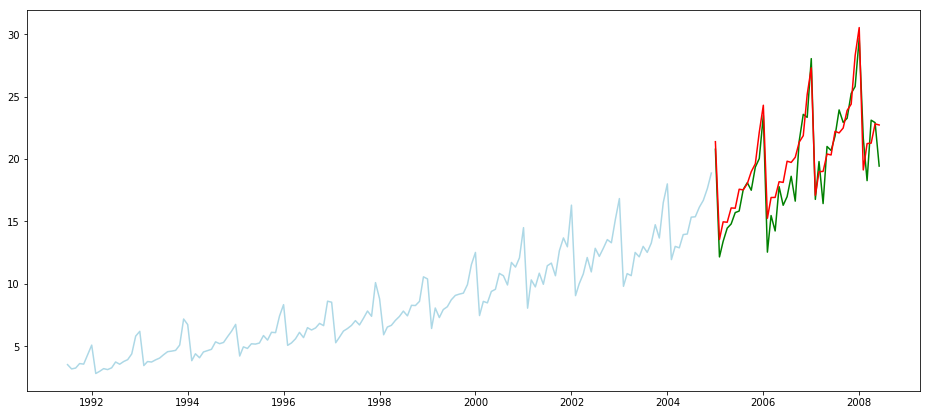

In [21]:
plt.figure(figsize=(16, 7))
plt.plot(x_train.index, x_train.values, color="lightblue")
plt.plot(x_test.index, x_test.values, color="green")

## Forecasting 
pred = pd.DataFrame(results.forecast(len(x_test)))
pred.columns = ["yhat"]
pred.index = x_test.index

## Converting from log to normal value
pred["yhat"] = pred["yhat"].apply(lambda x: math.exp(x)-1)

## Measuring error. 
measure = math.pow(mean_squared_error(x_test.values, pred.values), 0.5)
print(measure)
plt.plot(pred.index, pred.fillna(0).values, color="red")
plt.show()

- The SARIMA model has given an RMSE of 1.65, Which is better than any model we have built till now. 

Isn't time-series forecasting fun? Indeed it is simple Mathematics with some basics statistics. Lets move on to our model based apporaches in the next session.

### Lets End it here 

<center> <h1> LETS TAKE QUESTIONS NOW... </h1> <center>

Resources used 
- http://otexts.org/fpp2